<a href="https://colab.research.google.com/github/StMaCre/french_song_level_analysis/blob/main/Chansons_es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!pip install langdetect
!python -m spacy download es_dep_news_trf

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import re
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
import requests

In [3]:
#Download spacy French object
nlp = spacy.load("es_dep_news_trf")

# File reading and cleaning

In [ ]:
# Create the dataframe with all the songs
df = pd.read_csv("songs.csv", sep="/")
# Drop uneeded columns
df = df.drop("Unnamed: 0", axis = 1)
# Clean the lyrics
df["text"] = df['text'].str.replace(r"<.*>", '', regex=True)
df["text"] = df["text"].str.replace(r"\d", " ", regex=True)
df["text"] = df["text"].str.replace(r"aa+h*a?h?|^o+h+"," ", regex=True)
df["text"] = df["text"].str.replace(r"\n", " ", regex=True)
df["text"] = df["text"].str.replace(r"[,.?!;'´-]", " ", regex=True)
df["text"] = df["text"].str.replace(r"(&nbsp)", " ", regex=True)
df['text'] = df['text'].str.replace(r'_*', '', regex=True)
df['title'] = df['title'].str.replace(r'lyrics', '', regex=True)
# Select only a small sample (unecomment if you want to test on the first few rows)
#df = df.drop(df.index[6:])

In [4]:
# Create df with the genres
df = pd.read_csv('df_genres.csv')
df = df.drop("Unnamed: 0", axis = 1)

In [5]:
df

,artist,title,album,text,word_count,genres
0,Manu Chao,Clandestino,Album: Clandestino,Sola va mi condena Correr es mi destino Para ...,123,World
1,Carlos Vives,La Bicicleta,Album: Vives,Nada voy a hacer Rebuscando en las heridas de...,394,Pop in Spanish
2,Ender Thomas,Eres mi Reina,NaN,ya no le encuentro más nigún sentido no me a...,53,unknown
3,Soy Luna (OST),Mírame a mí,Album: Soy Luna,Puedo bajar Me sobra el tiempo Para ganar Pue...,119,unknown
4,Enrique Iglesias,El perdedor,Album: Sex and Love [2014],Si el pasado está a prueba de tu amor Y no te...,190,unknown
...,...,...,...,...,...,...
4591,David Bisbal,Soldado de papel,Album: Premonición (2006),Sólo dolor Sin marcha atrás ni dirección Tie...,191,unknown
4592,Reyli Barba,Ando Por las Nubes,NaN,perseguí su corazón le corte diez mil estrell...,119,Pop in Spanish
4593,Tania Libertad,Amar Amando,NaN,amar desde la vida hasta la muerte amar amar...,99,unknown
4594,R.K.M & Ken-Y,Pensando En Ti,NaN,so��o con el momento en que vuelvas ami pasan...,291,unknown


# Getting rid of songs that are not in Spanish

In [7]:
# Recognize language of the songs 
from langdetect import DetectorFactory, detect
from langdetect.lang_detect_exception import LangDetectException

In [8]:
# Check wether the text is in French or not return True/False
def is_spanish(text):
    try:
        if detect(text) != "es":
            return False
    except TypeError:
      return 'Error'
    except LangDetectException:
        return False
    return True

In [9]:
# Add a column which note if the song is in Spanish or not
df['spanish'] = df['text'].apply(is_spanish)
# Drop the songs that are not 
df.drop(df[df["spanish"] == False].index, inplace=True)

In [10]:
df = df.drop(['spanish'], axis=1)

# Adding the word count 
This will help us to get the percentage of words of a certain level in a song. 
As well, it would be interesting to know which genre has the longest kind of songs. 

In [11]:
def count_words(text):
  return len(str(text).split())

In [12]:
df['word_count'] = df['text'].apply(count_words)

In [13]:
df

,artist,title,album,text,word_count,genres
0,Manu Chao,Clandestino,Album: Clandestino,Sola va mi condena Correr es mi destino Para ...,123,World
1,Carlos Vives,La Bicicleta,Album: Vives,Nada voy a hacer Rebuscando en las heridas de...,394,Pop in Spanish
2,Ender Thomas,Eres mi Reina,NaN,ya no le encuentro más nigún sentido no me a...,53,unknown
3,Soy Luna (OST),Mírame a mí,Album: Soy Luna,Puedo bajar Me sobra el tiempo Para ganar Pue...,119,unknown
4,Enrique Iglesias,El perdedor,Album: Sex and Love [2014],Si el pasado está a prueba de tu amor Y no te...,190,unknown
...,...,...,...,...,...,...
4591,David Bisbal,Soldado de papel,Album: Premonición (2006),Sólo dolor Sin marcha atrás ni dirección Tie...,191,unknown
4592,Reyli Barba,Ando Por las Nubes,NaN,perseguí su corazón le corte diez mil estrell...,119,Pop in Spanish
4593,Tania Libertad,Amar Amando,NaN,amar desde la vida hasta la muerte amar amar...,99,unknown
4594,R.K.M & Ken-Y,Pensando En Ti,NaN,so��o con el momento en que vuelvas ami pasan...,291,unknown


# Adding the genre 

In [ ]:
import requests
url = 'https://api.musixmatch.com/ws/1.1/matcher.track.get'
key = 'your_key'

genres = []
for row in df.values:
  try :
    req = requests.get(url, params = {'apikey':key,'q_track':row[1], 'q_artist':row[0]})  
    data = req.json()
    genres.append(data['message']['body']['track']['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_name'])
  except :
    genres.append('unknown')
    pass

In [ ]:
df['genres'] = genres

In [6]:
df['genres'] = df['genres'].replace(['Pop in Spanish', 'Arabic Pop', 'Punjabi pop', 'Britpop', "Pop Punk", 'K-Pop', 'French pop'], 'Pop')
df['genres'] = df['genres'].replace(['Classic Christian', 'Praise & Worship', 'Christian Pop' ], 'Christian & Gospel')
df['genres'] = df['genres'].replace(['Rap', 'Alternative Rap', 'Latin Rap' ], 'Hip Hop/Rap')
df['genres'] = df['genres'].replace(['Alternative & Rock in Spanish'], 'Alternative & Rock')
df['genres'] = df['genres'].replace(['Modern Dancehall'], 'Dancehall')

In [7]:
df['genres'].value_counts()

unknown                2166
Pop                     920
Latin                   468
Latin Urban             262
Salsa y Tropical        151
Regional Mexicano       133
Alternative & Rock       84
World                    64
Music                    36
Dance                    31
Rock                     27
Hip Hop/Rap              26
Raices                   23
Christian & Gospel       22
Baladas y Boleros        20
Soundtrack               17
Alternative              14
Electronic               12
Classical                10
Reggae                   10
Singer/Songwriter         7
Children's Music          7
Brazilian                 7
Vocal                     6
Contemporary Latin        6
House                     5
Flamenco                  4
Tango                     4
South America             4
R&B/Soul                  4
Folk                      4
MPB                       3
Europe                    3
Pop/Rock                  3
Spoken Word               3
TV Soundtrack       

In [8]:
Merengue = ['Milly Quezada']
Electronica = ['Alacrán', 'Pedro Fernández', 'Dame tu mano']
Pop = ['Mocedades', 'Zoé', 'Franco De Vita ', 'Maite Perroni', 'Ana Gabriel', 'Reik', 'Il Divo', 'Carlos Rivera', 'Antonio Banderas', 'Nani Fernández', 'Muneca', 'Luis Miguel', 'Julio Iglesias', 'Marquess', 'Luis Miguel', 'Leo Dan', 'Selena', 'Sin Bandera', 'Lodovica Comello', 'Banda MS', 'Gipsy Kings', 'Shakira', 'Julieta Venegas', 'Camila', 'Sin Bandera', 'Lodovica Comello', "Banda MS", 'OV7', 'Yasmin Levy', 'Aracely Arámbula', 'Chayanne', 'Enrique Iglesias', 'Emma Shapplin']
Soundtrack = ['Moana (OST)', 'Violetta (OST)', 'Beauty and the Beast (Musical)', 'Soy Luna (OST)', 'Tangled (OST)']
Latin = ['Ender Thomas', 'Américo', 'Ibrahim Ferrer', 'Valentin Elizalde', 'Jyve V', 'Rosana (Spain)', 'Victor Manuelle', 'Sandra Echeverría', 'Intocable', 'Alacranes Musical', "Juan Gabriel", 'Victor Manuelle', 'Ulices Chaidez y Sus Plebes', 'Axel']
PopRock = ['Siggno', 'Maná']
Europe = ["Édith Piaf"]
Children = ['Mickey Mouse Clubhouse (OST)', 'Paola Vargas']
ChristiaGospel = ['Jesús Adrián Romero', 'Christian Hymns & Songs', 'Selah', 'Vino Nuevo']
World = ['Manu Chao']
Ska = ['Inspector']
LatinUrban = ['Juan Magán', 'Jencarlos Canela']
Vocal = ['Manuel Franjo']

In [9]:
for i in range(len(df.index)): 
  for artist in Children:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Children's Music"
  for artist in Pop:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Pop"
  for artist in Merengue:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Merengue"
  for artist in Electronica:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Electronica"
  for artist in Soundtrack:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Soundtrack"
  for artist in Latin:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Latin"
  for artist in PopRock:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Pop/Rock"
  for artist in Europe:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Europe"
  for artist in ChristiaGospel:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Christian & Gospel"
  for artist in World:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "World"
  for artist in Ska:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Ska"
  for artist in LatinUrban:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Latin Urban"
  for artist in Vocal:
    if df['genres'].iloc[i] == 'unknown':
      if df['artist'].iloc[i] == artist:
        df['genres'].iloc[i] = "Vocal"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
df

,artist,title,album,text,word_count,genres
0,Manu Chao,Clandestino,Album: Clandestino,Sola va mi condena Correr es mi destino Para ...,123,World
1,Carlos Vives,La Bicicleta,Album: Vives,Nada voy a hacer Rebuscando en las heridas de...,394,Pop
2,Ender Thomas,Eres mi Reina,NaN,ya no le encuentro más nigún sentido no me a...,53,Latin
3,Soy Luna (OST),Mírame a mí,Album: Soy Luna,Puedo bajar Me sobra el tiempo Para ganar Pue...,119,Soundtrack
4,Enrique Iglesias,El perdedor,Album: Sex and Love [2014],Si el pasado está a prueba de tu amor Y no te...,190,Pop
...,...,...,...,...,...,...
4591,David Bisbal,Soldado de papel,Album: Premonición (2006),Sólo dolor Sin marcha atrás ni dirección Tie...,191,unknown
4592,Reyli Barba,Ando Por las Nubes,NaN,perseguí su corazón le corte diez mil estrell...,119,Pop
4593,Tania Libertad,Amar Amando,NaN,amar desde la vida hasta la muerte amar amar...,99,unknown
4594,R.K.M & Ken-Y,Pensando En Ti,NaN,so��o con el momento en que vuelvas ami pasan...,291,unknown


# Adding the nationality

In [12]:
url = 'https://api.musixmatch.com/ws/1.1/artist.search'
key = 'your_key'

FR


In [13]:
nationality = []
for row in df.values:
  try :
    req = requests.get(url, params = {'apikey':key,'q_artist':row[0]})  
    data = req.json()
    nationality.append(data['message']['body']['artist_list'][0]['artist']['artist_country'])
  except :
    nationality.append('unknown')
    pass

In [14]:
df['nationality'] = nationality

Text(0.5, 0, 'Countries')

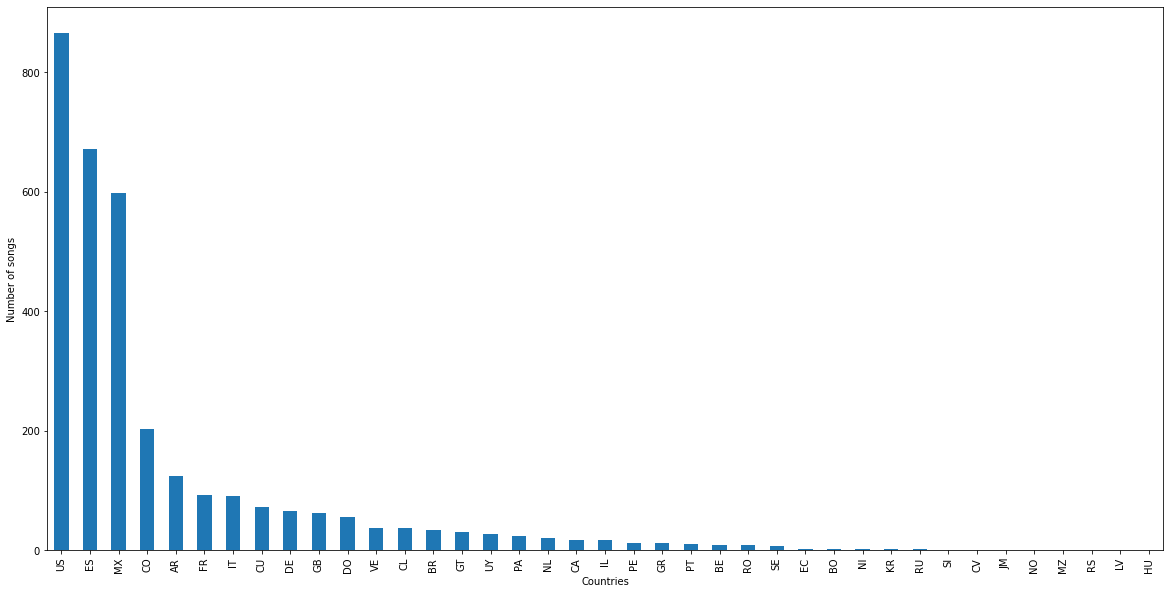

In [15]:
df[df['nationality'] != 'unknown']['nationality'].value_counts()[1:].plot(kind='bar', figsize=(20,10))
plt.ylabel('Number of songs')
plt.xlabel('Countries')

In [16]:
df['nationality'].value_counts().sort_values(ascending=False)

           1104
US          866
ES          672
MX          597
unknown     265
CO          203
AR          124
FR           93
IT           90
CU           73
DE           65
GB           63
DO           56
VE           38
CL           37
BR           34
GT           30
UY           28
PA           24
NL           21
IL           17
CA           17
PE           13
GR           12
PT           10
RO            9
BE            9
SE            7
EC            3
BO            2
NI            2
RU            2
KR            2
JM            1
SI            1
NO            1
CV            1
MZ            1
RS            1
LV            1
HU            1
Name: nationality, dtype: int64

# Understanding the data 

In [17]:
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
import collections
import matplotlib
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from matplotlib.text import Text

In [18]:
# Getting rid of the na
df = df[df['text'].notna()]
df = df[df['text'] != 'nan']
df = df.reset_index()
df = df.drop(["index"], axis=1)
#df= df.drop(['level_0'],axis=1)

## Wordcloud

In [19]:
stop_words = list(es_stop)
stop_words = stop_words + ['oh', 'pa', ')', 'ay', 'to ', 'como', 'ti', 'tú', 'ya', ")", ':', "»", "«", "i", '(x']

In [20]:
wordcount = {}
def count_word(text):
  for word in text.lower().split():
      if word not in stop_words:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

In [21]:
df['text'].apply(count_word)

0       None
1       None
2       None
3       None
4       None
        ... 
4591    None
4592    None
4593    None
4594    None
4595    None
Name: text, Length: 4596, dtype: object

In [22]:
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(100):
  print(word, ": ", count)

amor :  6653
quiero :  4994
vida :  3180
corazón :  2499
noche :  1542
tiempo :  1453
siento :  1356
mundo :  1222
alma :  1221
cuerpo :  1189
vas :  1144
vivir :  1015
dime :  1008
quieres :  951
ojos :  928
sol :  923
mujer :  911
cielo :  887
estás :  875
piel :  832
dolor :  807
you :  744
besos :  743
gusta :  714
tienes :  712
dios :  703
ven :  700
amo :  696
dame :  688
loco :  685
feliz :  684
beso :  682
to :  651
luz :  639
baby :  634
luna :  622
has :  621
amar :  619
mar :  615
cosas :  613
momento :  596
sentir :  594
voz :  558
boca :  548
mami :  547
ah :  544
eh :  543
fuego :  533
gente :  529
verte :  522
corazon :  521
miedo :  519
labios :  513
the :  510
importa :  509
mirada :  499
ganas :  493
volver :  492
manos :  491
duele :  486
llorar :  481
sigo :  481
camino :  480
sueño :  478
mira :  471
loca :  462
quisiera :  462
ves :  461
viento :  458
canción :  450
cama :  449
mañana :  446
muero :  444
falta :  442
hombre :  442
lejos :  439
digo :  439
olvidar 

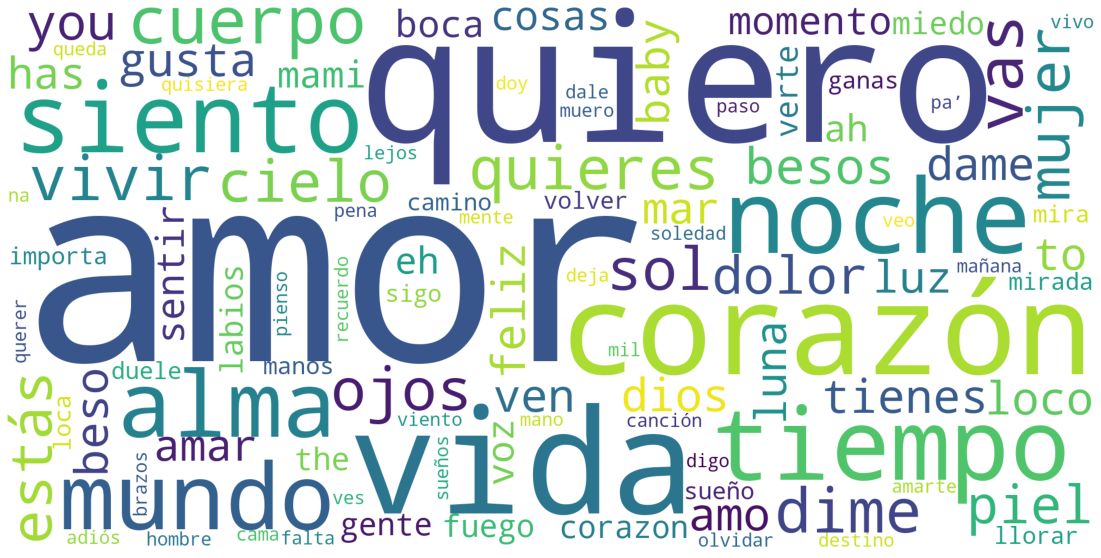

In [23]:
wc = WordCloud(background_color="white",width=2000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_counter)
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis('off')
plt.show()

## Songs per singers

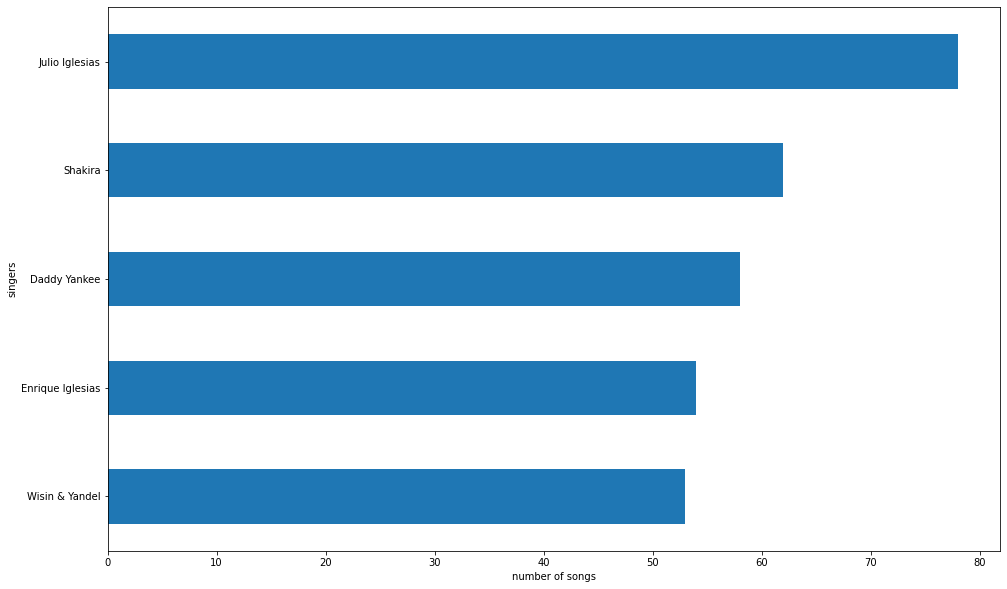

In [24]:
fig, ax = plt.subplots()
df['artist'].value_counts()[0:5].plot(kind='barh', figsize=(16, 10))
ax.invert_yaxis()
plt.xlabel('number of songs')
plt.ylabel('singers')
plt.show()

In [25]:
df['artist'].value_counts()[0:5]

Julio Iglesias      78
Shakira             62
Daddy Yankee        58
Enrique Iglesias    54
Wisin & Yandel      53
Name: artist, dtype: int64

## Word count 

In [26]:
genre_rank_words = df[df['genres'] != 'unknown'].groupby('genres')['word_count'].mean().sort_values()

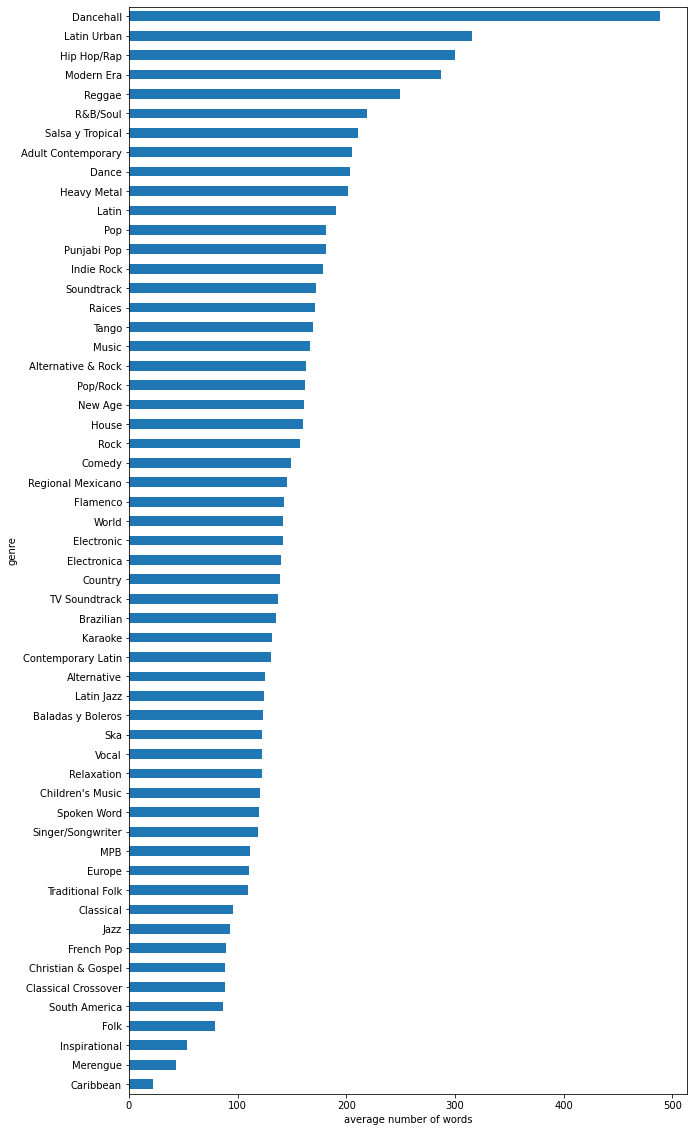

In [27]:
genre_rank_words.plot(kind = "barh", figsize= (10, 20))
plt.xlabel('average number of words')
plt.ylabel('genre')
plt.show()

In [28]:
nationality_rank_words = df[df['nationality'] != ' '].groupby('nationality')['word_count'].mean().sort_values()

In [29]:
nationality_rank_words

nationality
LV          58.000000
CV          77.000000
BO          79.000000
HU          87.000000
EC          89.666667
PE          95.230769
SI         103.000000
MZ         111.000000
IL         118.705882
GR         132.833333
NL         133.714286
BE         147.111111
AR         148.524194
NO         149.000000
MX         150.147404
CL         153.324324
FR         153.387097
DE         154.092308
UY         158.428571
unknown    165.075472
GB         168.047619
BR         170.058824
PT         171.600000
IT         172.333333
RS         174.000000
CU         175.904110
RU         180.000000
ES         182.867560
RO         187.888889
SE         191.714286
CA         200.411765
           206.902174
VE         210.526316
KR         213.000000
GT         227.200000
DO         229.464286
CO         234.152709
US         248.790993
PA         270.833333
NI         303.000000
JM         616.000000
Name: word_count, dtype: float64

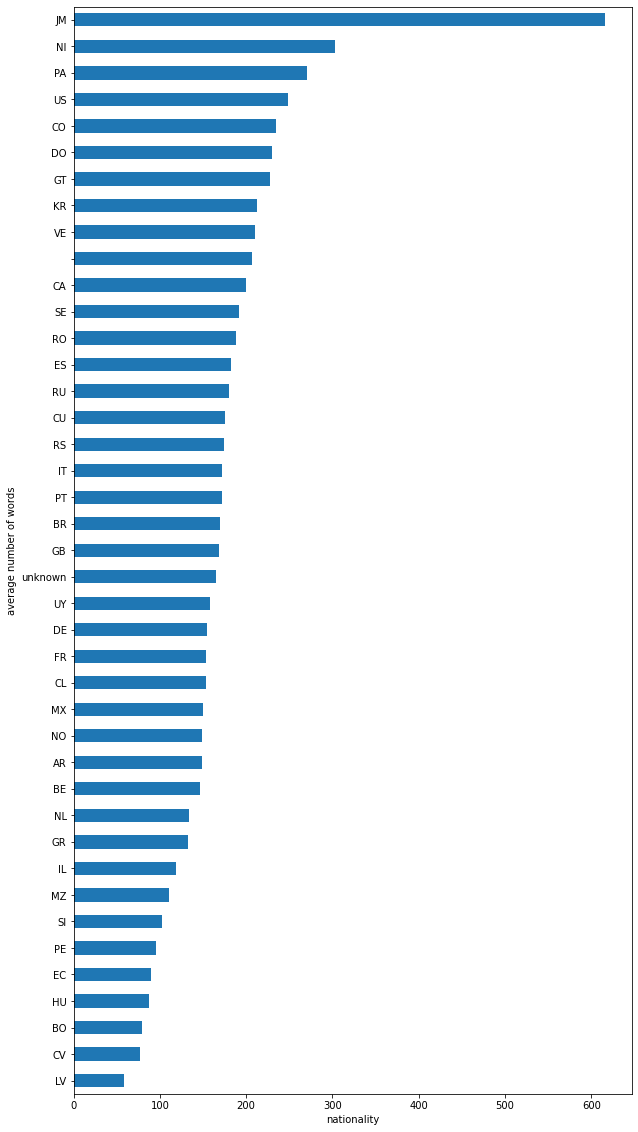

In [30]:
nationality_rank_words.plot(kind = "barh", figsize= (10, 20))
plt.xlabel('nationality')
plt.ylabel('average number of words')
plt.show()

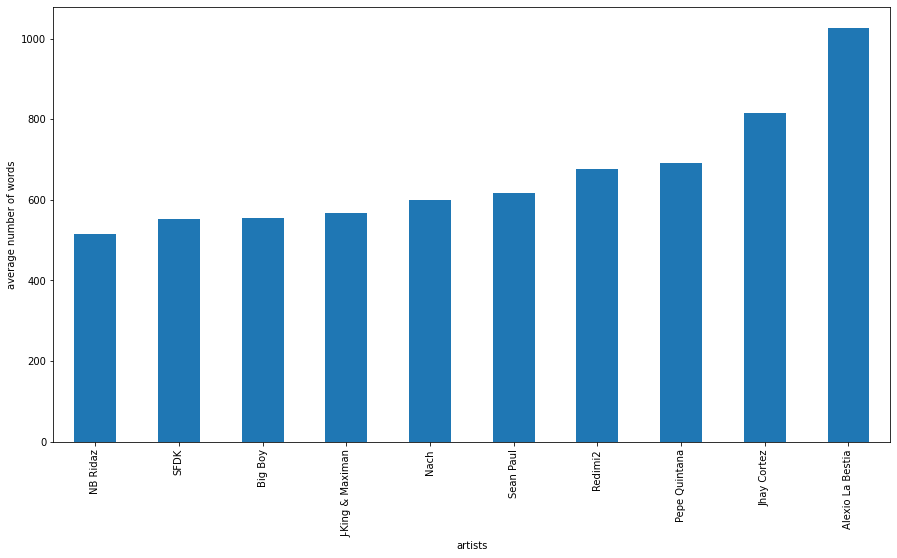

In [31]:
artist_rank_words = df.groupby('artist')['word_count'].mean().sort_values()
artist_rank_words[-10:].plot(kind = "bar", figsize= (15, 8))
plt.xlabel('artists')
plt.ylabel('average number of words')
plt.show()

In [32]:
artist_rank_words

artist
Alacrán               13.0
PALO                  22.0
Selah                 24.0
Cypress Hill          26.0
Tito Puente           26.0
                     ...  
Sean Paul            616.0
Redimi2              677.0
Pepe Quintana        691.0
Jhay Cortez          816.0
Alexio La Bestia    1027.0
Name: word_count, Length: 1291, dtype: float64

In [33]:
df[df['artist'] == 'Jhay Cortez']

,artist,title,album,text,word_count,genres,nationality
3697,Jhay Cortez,No me conoce (Remix),Album: Famouz (2019),(Se hace la que no me conoce Pero en mi cama ...,816,Latin Urban,


# Getting the list of words per level

The list of frequency come from the Real Academia Espanola. 

REAL ACADEMIA ESPAÑOLA: Banco de datos (CORDE) [en línea]. Corpus diacrónico del español. <http://www.rae.es> [22.06.2022]



As this time, I don't have only the base form, I need to find another way to count the words per level. This [article](https://universeofmemory.com/how-many-words-you-should-know/)  gave me a methodology for counting the number of different words not in their base form. 


"The relationship between the receptive word knowledge of a learner and the
CEFR levels for Dutch is A2 – 2000 words, B1 – 5000 and B2 – 12000 (Bossers 2010: 172)."  (https://universeofmemory.com/how-many-words-you-should-know/)

In [34]:
df_words = pd.read_csv('frequencia.csv')
df_words['words'] = df_words[' Orden  Frec.absoluta    Frec.normalizada '].str.extract(r"([a-záóéíúñü]+)")
df_words = df_words['words']
A1 = df_words[0:1000]
A2 = df_words[1000:2000]
B1 = df_words[2000:5000]
B2 = df_words[-5000:]

In [35]:
print(len(A1), len(A2), len(B1), len(B2))
print(len(A1) + len(A2) + len(B1) + len(B2))

1000 1000 3000 5000
10000


# Classification

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse

In [37]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df["text"])
count_array = count_matrix.toarray()
df_table = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())

In [38]:
df_dtm = df_table.T
df_dtm = df_dtm.reset_index(level=0)
df_dtm = df_dtm.rename(columns={"index": "word"})
print(df_dtm)

        word  0  1  2  3  4  5  6  7  8  ...  4586  4587  4588  4589  4590  \
0         aa  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
1        aah  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
2      aaron  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
3        aay  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
4         ab  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
...      ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   
33862    화려한  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
33863    흐르는  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
33864    흔들어  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
33865   흔들어줘  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   
33866  ﬁrmes  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0   

       4591  4592  4593  4594  4595  
0         0     0     0  

In [ ]:
df_dtm[500:550]

In [39]:
df_dtm["level"] = None
for i in range(len(df_dtm.index)): 
  for word in A1: 
    if df_dtm["word"].iloc[i] == word:
      df_dtm["level"].iloc[i] = "A1"
      break 
  for word in A2: 
    if df_dtm["word"].iloc[i] == word: 
      df_dtm["level"].iloc[i] = "A2"
      break
  for word in B1: 
    if df_dtm["word"].iloc[i] == word:
      df_dtm["level"].iloc[i] = "B1"
      break 
  for word in B2: 
    if df_dtm["word"].iloc[i] == word:
      df_dtm["level"].iloc[i] = "B2"
      break    

In [40]:
df_level = df_dtm.groupby(by="level").sum()
print(df_level)

       0     1     2     3     4     5     6     7     8     9     ...  4586  \
level                                                              ...         
A1       87   252    36    76   145   229    92   165    58    90  ...    33   
A2        3    30     6    12     5    18    10    14     9     7  ...     6   
B1        7    13     1     8     9    17    13     8    11    11  ...     4   
B2        7    19     2     5    10    20    10    14     2     5  ...    17   

       4587  4588  4589  4590  4591  4592  4593  4594  4595  
level                                                        
A1       83   112    90    54   134    70    43   182    52  
A2        7    15    13    13    10    11     0    32     7  
B1       17     4    11     8    14     8    11    15     7  
B2        6     5     7     9    15     4    30     7     4  

[4 rows x 4596 columns]


In [41]:
# Create a dictionary with the percentage of words of each level for each songs
songs_percentage = {}
i =0 
while i < len(df):
  songs_percentage[i] = []
  for row in df_level[i]: 
    songs_percentage[i].append((row/df.loc[i]['word_count'])*100)
  i += 1

In [42]:
percentage = pd.DataFrame.from_dict(songs_percentage)
percentage = percentage.T
percentage = percentage.rename(columns={0: "A1", 1: "A2", 2:"B1", 3:"B2"})
df_complete = df.join(percentage)
df_complete['A']= df_complete['A1'] + df_complete['A2']
df_complete['A + B']= df_complete['A1'] + df_complete['A2'] + df_complete['B1'] + df_complete['B2']
df_easiest = df_complete.sort_values("A1", ascending=False)
df_medium = df_complete.sort_values("A", ascending = False)
df_hardest = df_complete.sort_values("A + B", ascending = False)

In [43]:
top_50_A1 = []
for x in range(50):
  title = df_easiest.iloc[x]['title']
  artiste = df_easiest.iloc[x]['artist']
  genre = df_easiest.iloc[x]["genres"]
  top_50_A1.append(str(title) + " by " + str(artiste) + " (genre = " + str(genre) + ")")

top_50_A1

['Sueño de Noche  by Gipsy Kings (genre = Latin)',
 "¡Qué bien! [Hot Dog Dance] (Latin Spanish)  by Mickey Mouse Clubhouse (OST) (genre = Children's Music)",
 'La despedida  by Shakira (genre = Folk)',
 'Te quiero tanto  by OV7 (genre = Pop)',
 'Toma mi vida  by Milly Quezada (genre = Merengue)',
 '¿Dónde Están, Corazón?  by Enrique Iglesias (genre = Pop)',
 'Así es la mujer que amo  by Victor Manuelle (genre = Latin)',
 'Más  by Nelly Furtado (genre = Pop)',
 '5 razones  by Manu Chao (genre = World)',
 'Nada ni nadie  by Soy Luna (OST) (genre = Soundtrack)',
 'Quién será  by Aracely Arámbula (genre = Pop)',
 'Quién será  by La Sonora Matancera (genre = Latin)',
 'La mejor parte de mí  by Juanes (genre = Pop)',
 'Soy yo  by Soy Luna (OST) (genre = Soundtrack)',
 'No hace falta  by Julieta Venegas (genre = Pop)',
 'Un cambio en mí [A Change in Me]  by Beauty and the Beast (Musical) (genre = Soundtrack)',
 'La La La  by Shakira (genre = Pop)',
 'Pídeme la luna  by Leo Dan (genre = Pop)',

In [44]:
top_medium = pd.merge(df_easiest[0:50], df_medium[0:100], on= ['title', 'artist', 'genres'], how='outer', indicator = True).query('_merge=="right_only"')
top_50_A2 = []
for x in range(50):
  title = top_medium.iloc[x]['title']
  artiste = top_medium.iloc[x]['artist']
  genre = top_medium.iloc[x]["genres"]
  top_50_A2.append(str(title) + " by " + str(artiste) + " (genre = " + str(genre) + ")")

top_50_A2

['Tú estás aquí  by Jesús Adrián Romero (genre = Christian & Gospel)',
 'Reflejo de Luna  by Alacrán (genre = Electronica)',
 'Eres tú  by Mocedades (genre = Pop)',
 'A Lo Mejor  by Banda MS (genre = Pop)',
 'Mi primer amor  by Ender Thomas (genre = Latin)',
 'Lo que yo sé de ti  by Ha*Ash (genre = Pop)',
 'Me voy  by Yasmin Levy (genre = Pop)',
 'Por qué será  by Xtreme (genre = Salsa y Tropical)',
 'Amor Genuino  by Zion & Lennox (genre = Latin Urban)',
 'Renuevame  by Christian Hymns & Songs (genre = Christian & Gospel)',
 'No Vivire  by Gipsy Kings (genre = Pop)',
 'Algo está cambiando  by Julieta Venegas (genre = Pop)',
 'La vida en rosa  by Édith Piaf (genre = Europe)',
 'Aire soy  by Miguel Bosé (genre = Pop)',
 'Por qué me enamore  by Ulices Chaidez y Sus Plebes (genre = Latin)',
 'Perdóname  by Amaral (genre = Pop)',
 'Sólo para ti  by Soy Luna (OST) (genre = Soundtrack)',
 'Cuerpo sin alma  by Emma Shapplin (genre = Pop)',
 'La carta  by Héroes del Silencio (genre = Alternati

In [45]:
top_hard = pd.merge(df_medium[0:150], df_hardest[0:200], on= ['title', 'artist', 'genres'], how='outer', indicator = True).query('_merge=="right_only"')
top_50_B = []
for x in range(50):
  title = top_hard.iloc[x]['title']
  artiste = top_hard.iloc[x]['artist']
  genre = top_hard.iloc[x]['genres']
  top_50_B.append(str(title) + " by " + str(artiste) + " (genre = " + str(genre) + ")")

top_50_B

['Porque  by Yasmin Levy (genre = Raices)',
 'Dame tu mano  by Glorya (genre = unknown)',
 'Los adolescentes  by Dënver (genre = Pop)',
 'La incondicional  by Luis Miguel (genre = Pop)',
 'Vayamos compañeros  by Marquess (genre = Pop)',
 'Años  by Mercedes Sosa (genre = Latin)',
 'Amor, amor, amor  by Julio Iglesias (genre = Pop)',
 'You are my hiding place  by Selah (genre = Christian & Gospel)',
 'Vai (LLP Remix)  by Muneca (genre = Pop)',
 'Amada amante  by Roberto Carlos (genre = Brazilian)',
 'Caraluna  by Bacilos (genre = Pop)',
 'Otro Día Más Sin Verte  by Jon Secada (genre = Latin)',
 'Que El Corazón No Hable Por Mí  by Fifth Harmony (genre = Pop)',
 'Me entrego a ti  by Ha*Ash (genre = Latin)',
 'El Adios  by Amigos de Gines (genre = Raices)',
 'Amor, amor, amor  by Luis Miguel (genre = Pop)',
 'Respirar  by Bebe (genre = Pop)',
 'Ya lo sé que tú te vas  by Juan Gabriel (genre = Latin)',
 'Juego es tuyo  by Mazz (genre = Regional Mexicano)',
 'Corazón, corazón  by Julio Iglesi

In [46]:
df_most_A = df_complete.sort_values("A", ascending=False)

In [47]:
df_complete["A_round"] = df_complete['A'].apply(round)
df_complete["AB_round"] = df_complete['A + B'].apply(round)

In [48]:
df_count_A = df_complete.groupby("A_round")['title'].count()
df_count_AB = df_complete.groupby("AB_round")['title'].count()

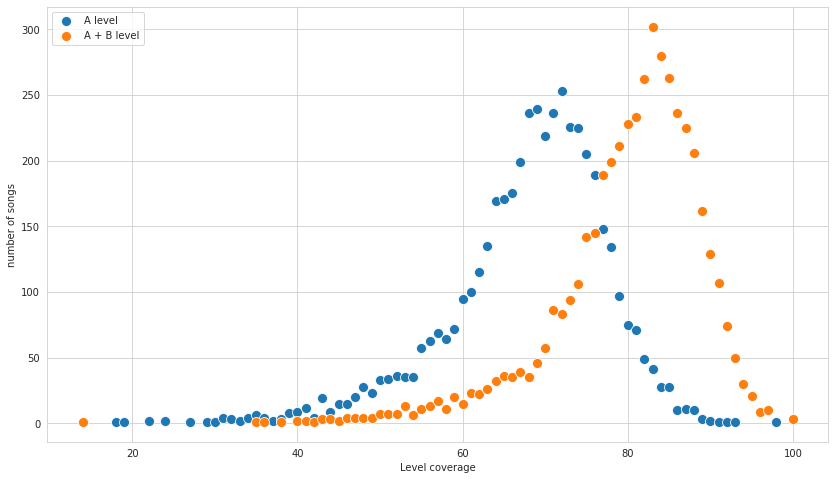

In [49]:
#Number of songs per percentage of A and A+B
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
ax1 = sns.scatterplot(data=df_count_A, s=100, ax=ax, palette="deep", label='A level')
ax2 = sns.scatterplot(data=df_count_AB, s=100, ax=ax, palette="deep", label='A + B level')
plt.legend(loc='upper left');
plt.xlabel('Level coverage')
plt.ylabel('number of songs')
plt.show()

In [50]:
df_complete

,artist,title,album,text,word_count,genres,nationality,A1,A2,B1,B2,A,A + B,A_round,AB_round
0,Manu Chao,Clandestino,Album: Clandestino,Sola va mi condena Correr es mi destino Para ...,123,World,FR,70.731707,2.439024,5.691057,5.691057,73.170732,84.552846,73,85
1,Carlos Vives,La Bicicleta,Album: Vives,Nada voy a hacer Rebuscando en las heridas de...,394,Pop,CO,63.959391,7.614213,3.299492,4.822335,71.573604,79.695431,72,80
2,Ender Thomas,Eres mi Reina,NaN,ya no le encuentro más nigún sentido no me a...,53,Latin,,67.924528,11.320755,1.886792,3.773585,79.245283,84.905660,79,85
3,Soy Luna (OST),Mírame a mí,Album: Soy Luna,Puedo bajar Me sobra el tiempo Para ganar Pue...,119,Soundtrack,unknown,63.865546,10.084034,6.722689,4.201681,73.949580,84.873950,74,85
4,Enrique Iglesias,El perdedor,Album: Sex and Love [2014],Si el pasado está a prueba de tu amor Y no te...,190,Pop,ES,76.315789,2.631579,4.736842,5.263158,78.947368,88.947368,79,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,David Bisbal,Soldado de papel,Album: Premonición (2006),Sólo dolor Sin marcha atrás ni dirección Tie...,191,unknown,ES,70.157068,5.235602,7.329843,7.853403,75.392670,90.575916,75,91
4592,Reyli Barba,Ando Por las Nubes,NaN,perseguí su corazón le corte diez mil estrell...,119,Pop,MX,58.823529,9.243697,6.722689,3.361345,68.067227,78.151261,68,78
4593,Tania Libertad,Amar Amando,NaN,amar desde la vida hasta la muerte amar amar...,99,unknown,MX,43.434343,0.000000,11.111111,30.303030,43.434343,84.848485,43,85
4594,R.K.M & Ken-Y,Pensando En Ti,NaN,so��o con el momento en que vuelvas ami pasan...,291,unknown,US,62.542955,10.996564,5.154639,2.405498,73.539519,81.099656,74,81


# Classification by artists

In [51]:
level_artist_rank = df_complete.groupby('artist')["A + B"].mean().sort_values()

In [52]:
level_artist_rank.sort_values(ascending=False)[0:50]

artist
Alacrán                           100.000000
Milly Quezada                     100.000000
Glorya                             96.825397
Dënver                             96.774194
Édith Piaf                         96.774194
Beauty and the Beast (Musical)     96.470588
Selah                              95.833333
Muneca                             95.789474
Javier Limón                       95.652174
Jon Secada                         95.402299
Amigos de Gines                    95.238095
Tavo Barcenas                      94.871795
Marisela                           94.871795
Nani Fernández                     94.701987
Antonio Banderas                   94.354839
Los Kjarkas                        94.285714
Américo                            94.007491
Tangled (OST)                      93.893130
Vino Nuevo                         93.750000
Rammstein                          93.750000
Gustavo Cerati                     93.670886
Ibrahim Ferrer                     93.333333
Ama

# Classification by genre 
Trying to figure out what genre are easiest to learn. 

In [53]:
level_genre_rank = df_complete.groupby('genres')["A + B"].mean().sort_values()

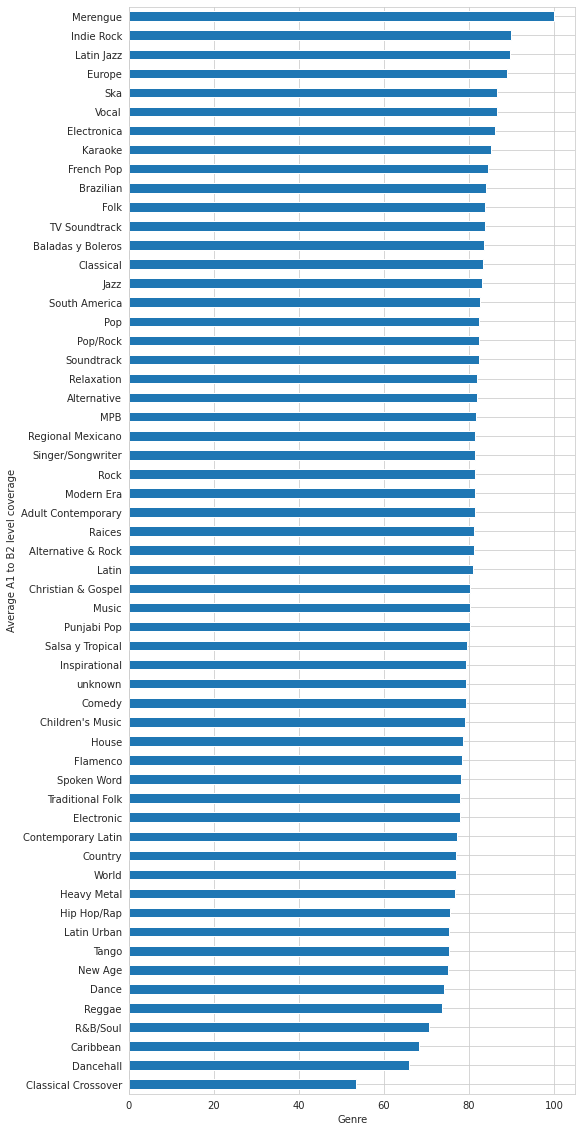

In [54]:
level_genre_rank.plot(kind='barh', figsize=(8, 20))
plt.xlabel('Genre')
plt.ylabel('Average A1 to B2 level coverage')
plt.show()

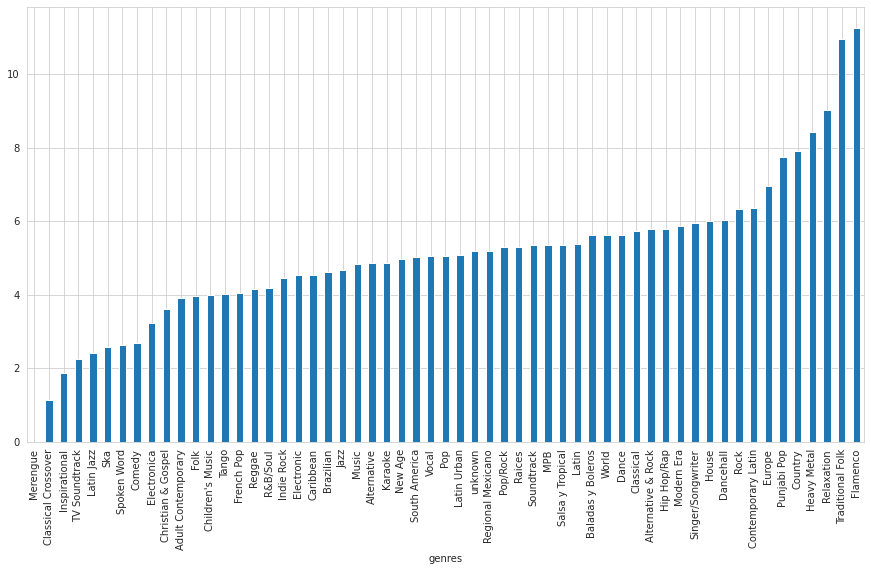

In [55]:
levelB2_genre_rank = df_complete.groupby('genres')["B2"].mean().sort_values()
levelB2_genre_rank.plot(kind='bar', figsize=(15, 8))

In [56]:
df_complete_graph = df_complete[['artist', 'title', 'genres', "nationality", 'A', 'A + B']]
df_complete_graph.to_csv("df_complete_graph.csv")

In [57]:
df_complete.to_csv('df_complete.csv')

In [ ]:
df.to_csv('df_genres.csv')